In [1]:
!pip install pmdarima

In [4]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas as pd
import statsmodels.graphics.tsaplots as sgt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from prophet import Prophet
import warnings
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")
sns.set()

### Datos

In [9]:
train = pd.read_csv('/home/bbchanchis/curso-series-temporales/12. Prediciendo el futuro/Python/2005_2006_flights.csv')
test = pd.read_csv('/home/bbchanchis/curso-series-temporales/12. Prediciendo el futuro/Python/2007_flights.csv')

In [10]:
train.head(2)

,year_month,count
0,2005-01-01,594924
1,2005-02-01,545332


### Auto Arima

In [11]:
train_autoarima = train.copy()
test_autoarima = test.copy()

In [12]:
train_autoarima.year_month = pd.to_datetime(train_autoarima.year_month)
train_autoarima.set_index("year_month", inplace=True)
train_autoarima.head(2)

,count
year_month,
2005-01-01,594924
2005-02-01,545332


In [13]:
test_autoarima.year_month = pd.to_datetime(test_autoarima.year_month)
test_autoarima.set_index("year_month", inplace=True)
test_autoarima.head(2)

,count
year_month,
2007-01-01,621559
2007-02-01,565604


In [14]:
train_autoarima.index.freq = 'MS'
train_autoarima.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01', '2005-11-01', '2005-12-01',
               '2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01'],
              dtype='datetime64[ns]', name='year_month', freq='MS')

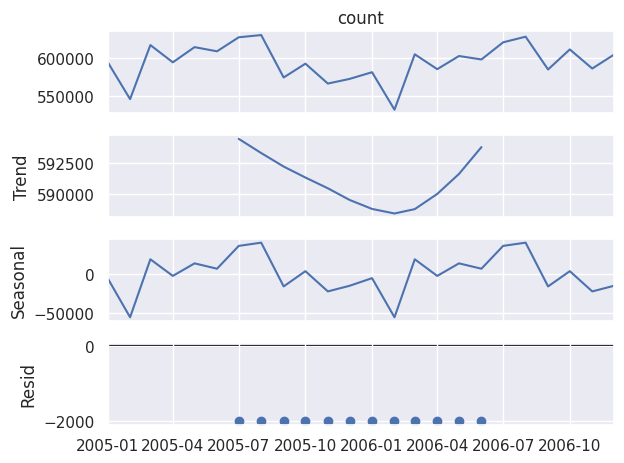

In [15]:
sd = seasonal_decompose(train_autoarima['count'], model='add')
sd.plot();

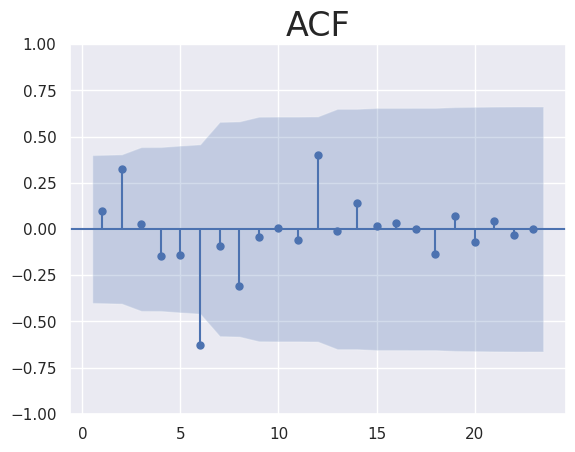

In [38]:
plot_acf(train_autoarima['count'], lags = 23, zero = False)
plt.title("ACF", size = 24)
plt.show()

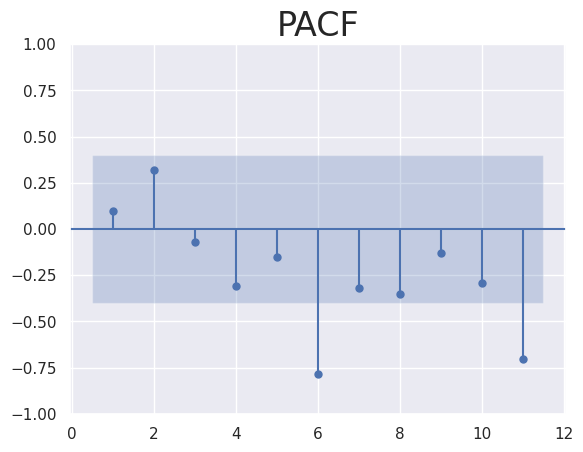

In [17]:
plot_pacf(train_autoarima['count'], lags = 11, zero = False, method = ('ols'))
plt.title("PACF", size = 24)
plt.show()

In [18]:
model_auto = auto_arima(train_autoarima)

In [19]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -272.794
Date:                Sun, 17 Mar 2024   AIC                            557.587
Time:                        19:23:35   BIC                            564.656
Sample:                    01-01-2005   HQIC                           559.462
                         - 12-01-2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.875e+05    1.6e-06   2.41e+11      0.000    3.88e+05    3.88e+05
ar.L1          0.6899      0.426      1.620      0.105      -0.145       1.525
ar.L2         -0.3416      0.425     -0.804      0.422      -1.175       0.492
ma.L1         -0.8007      0.430     -1.863      0.062      -1.643       0.042
ma.L2          0.9368      0.604      1.550      0.121      -0.248       2.121
sigma2       4.65e+08   1.84e-09   2.52e+17      0.000    4.65e+08    4.65e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.98   Prob(JB):                         0.20
Heteroskedasticity (H):               0.43   Skew:                            -0.90
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+33. Standard errors may be unstable.
"""

### Predicciones

In [20]:
len(test_autoarima)

12

In [21]:
pred = pd.DataFrame(model_auto.predict(n_periods = len(test_autoarima)), index = test_autoarima.index)

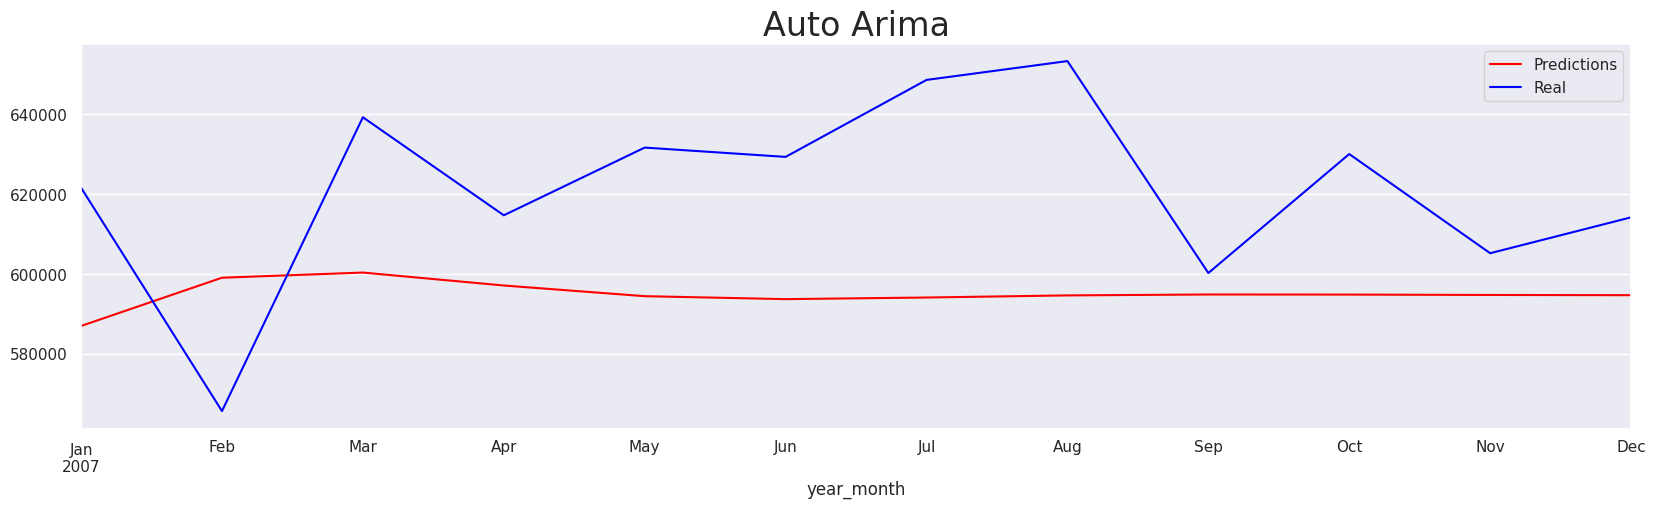

In [22]:
pred.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Configurando Auto Arima

In [23]:
model_auto = auto_arima(train_autoarima, start_p=1,start_q=1, max_p=12,max_q=12, max_order=None,start_P=1,start_Q=0,m=12,d=0,D=1)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   24
Model:             SARIMAX(3, 0, 2)x(0, 1, [], 12)   Log Likelihood                   0.000
Date:                             Sun, 17 Mar 2024   AIC                             14.000
Time:                                     19:23:57   BIC                             17.394
Sample:                                 01-01-2005   HQIC                            12.743
                                      - 12-01-2006                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.387e+04         -0        inf      0.000   -1.39e+04   -1.39e+04
ar.L1              -0         -0        nan        nan           0          -0
ar.L2              -0         -0        nan        nan           0          -0
ar.L3              -0         -0        nan        nan           0          -0
ma.L1               0         -0        nan        nan           0           0
ma.L2              -0         -0        nan        nan           0          -0
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

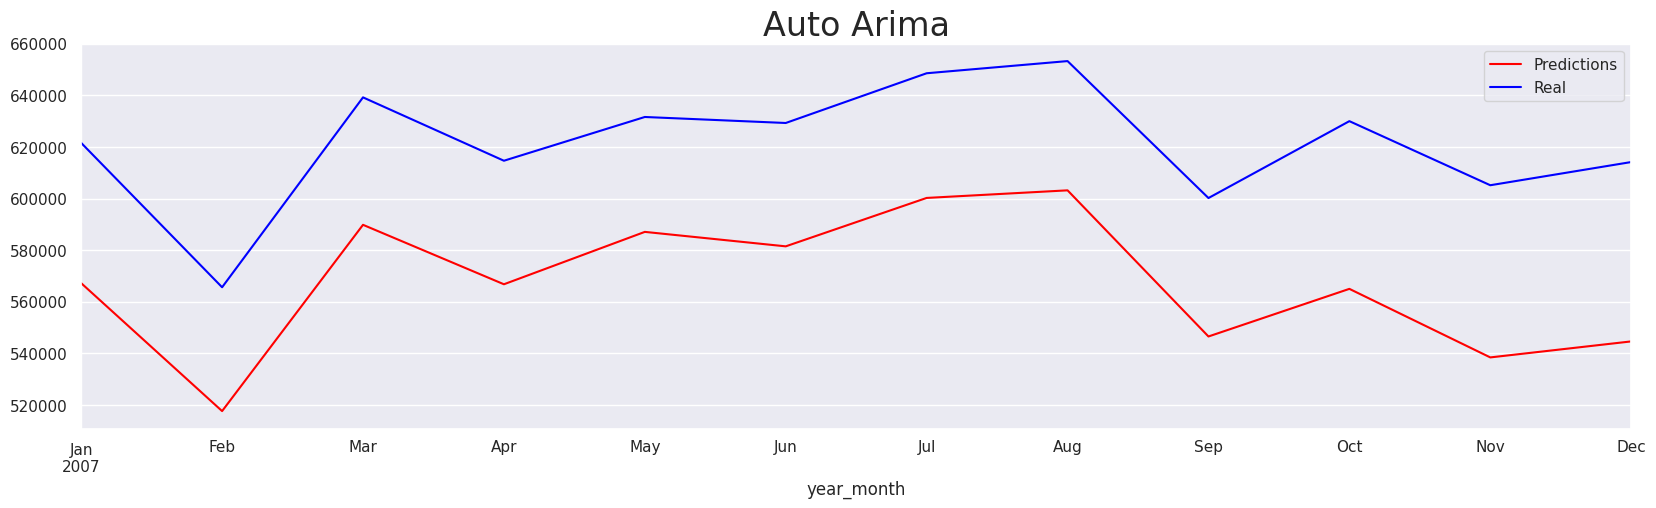

In [24]:
pred = pd.DataFrame(model_auto.predict(n_periods = len(test_autoarima)), index = test_autoarima.index)
pred.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37006D+00    |proj g|=  6.04018D+00

At iterate    5    f=  6.31323D+00    |proj g|=  2.33772D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     32      1     0     0   2.247D-02   6.313D+00
  F =   6.3132334744791168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


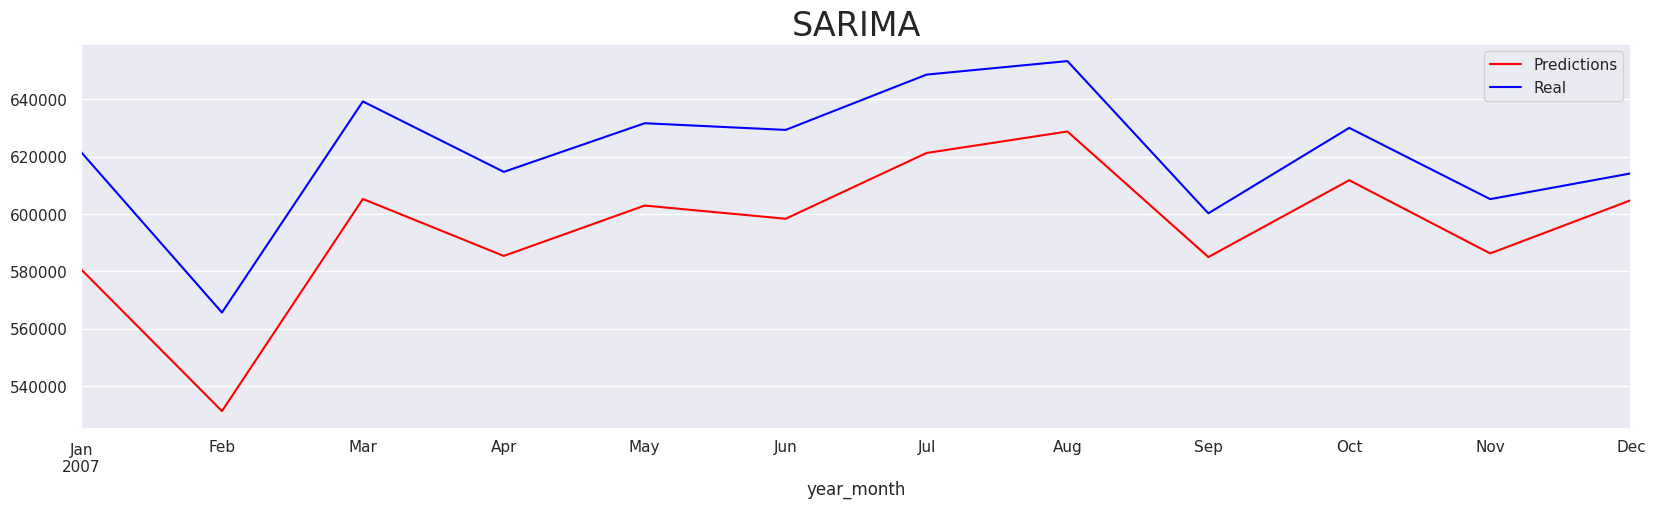

In [25]:
model_sarima = SARIMAX(train_autoarima, order = (1,0,0), seasonal_order = (1,1,1,12))
results_sarima = model_sarima.fit()
start_date='2007-01-01'
end_date='2007-12-01'
pred_sarima = results_sarima.predict(start = start_date, end = end_date)

pred_sarima.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("SARIMA", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Prophet

In [26]:
train.columns = ['ds','y']
train['ds'] = pd.to_datetime(train['ds'])
train.head(2)

,ds,y
0,2005-01-01,594924
1,2005-02-01,545332


In [27]:
test.year_month = pd.to_datetime(test.year_month)
test.set_index("year_month", inplace=True)
test.head(2)

,count
year_month,
2007-01-01,621559
2007-02-01,565604


19:23:58 - cmdstanpy - INFO - Chain [1] start processing
19:23:58 - cmdstanpy - INFO - Chain [1] done processing


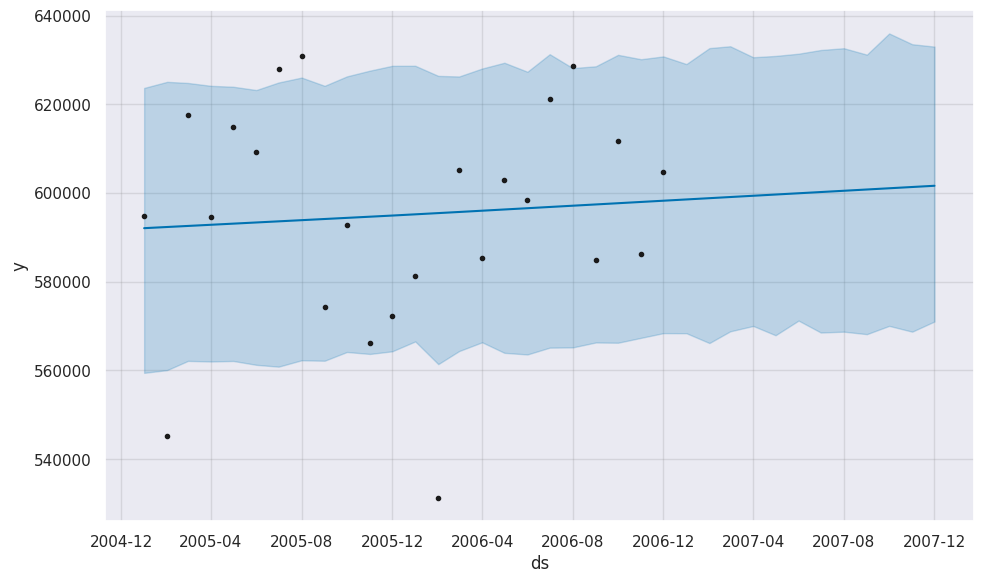

In [28]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(12, freq='MS') # MS: primer día del mes https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
forecast = m.predict(future)
fig = m.plot(forecast)

In [29]:
# Save predictions
pred_prophet = pd.DataFrame(forecast.yhat[-12:].values, index = forecast[-12:].ds.values)
pred_prophet.head(2)

,0
2007-01-01,598541.626535
2007-02-01,598827.712129


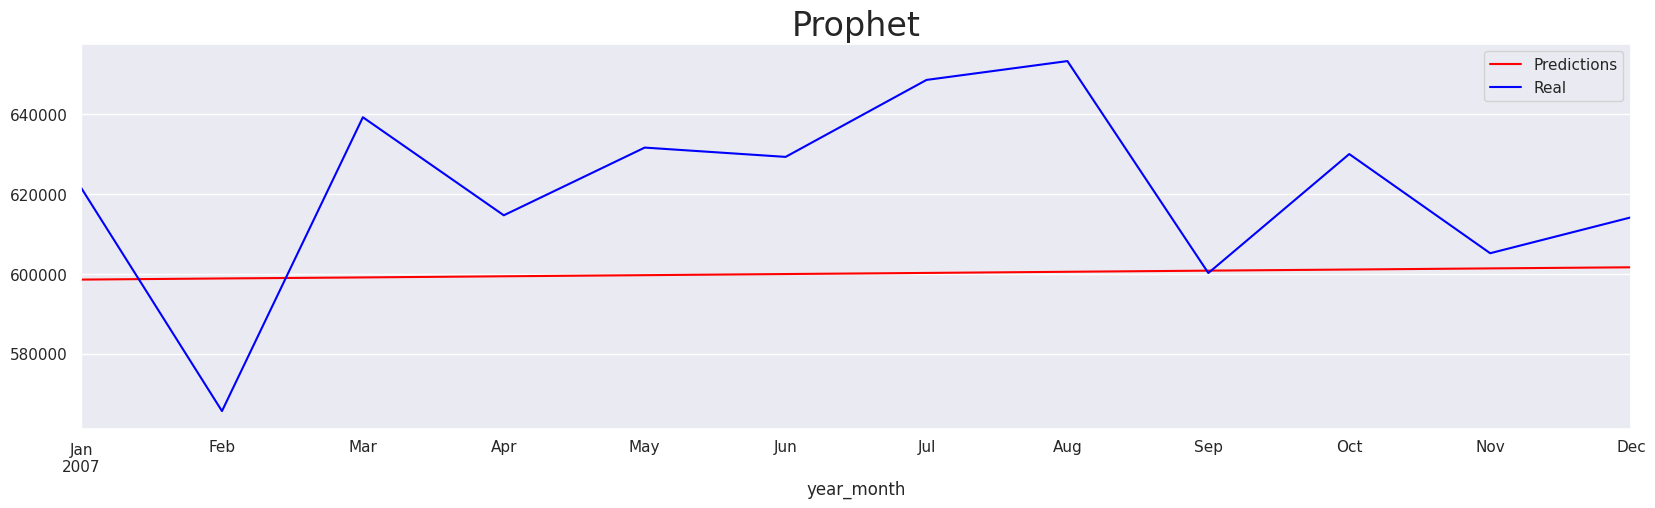

In [30]:
pred_prophet.plot(figsize = (20,5), color = "red")
test['count'].plot(color = "blue")
plt.title("Prophet", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Configuración de Prophet

21:04:28 - cmdstanpy - INFO - Chain [1] start processing


21:04:37 - cmdstanpy - INFO - Chain [1] done processing


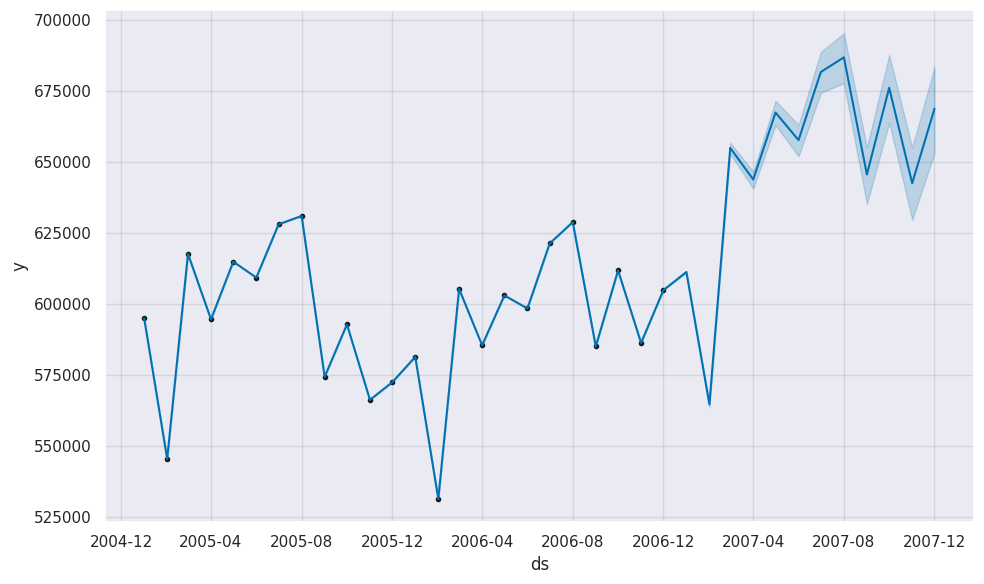

In [55]:
m = Prophet(yearly_seasonality=True, seasonality_mode = 'multiplicative')
m.fit(train)
future = m.make_future_dataframe(12, freq='MS') # MS: primer día del mes https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
forecast = m.predict(future)
fig = m.plot(forecast)

In [56]:
# Save predictions
pred_prophet = pd.DataFrame(forecast.yhat[-12:].values, index = forecast[-12:].ds.values)
pred_prophet.head(2)

,0
2007-01-01,611166.853161
2007-02-01,564530.449873


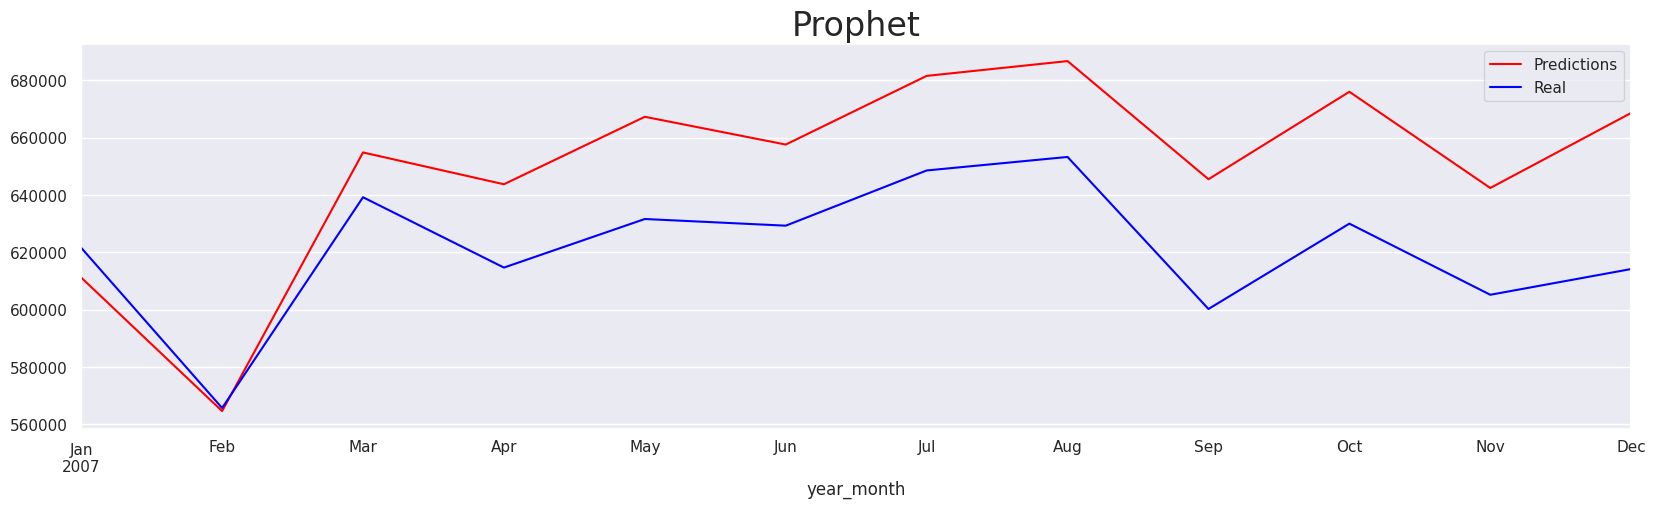

In [57]:
pred_prophet.plot(figsize = (20,5), color = "red")
test['count'].plot(color = "blue")
plt.title("Prophet", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Comparando Auto Arima, SARIMA y Prophet


In [58]:
predictions=pd.DataFrame(pred.values,columns=['autoarima'],  index = test_autoarima.index)

In [59]:
predictions['sarima']=pred_sarima.values
predictions['prophet']=pred_prophet.values
predictions['test']=test['count']
predictions.head(2)

,autoarima,sarima,prophet,test
year_month,,,,
2007-01-01,567191.296401,580666.750377,611166.853161,621559
2007-02-01,517599.296401,531241.700076,564530.449873,565604


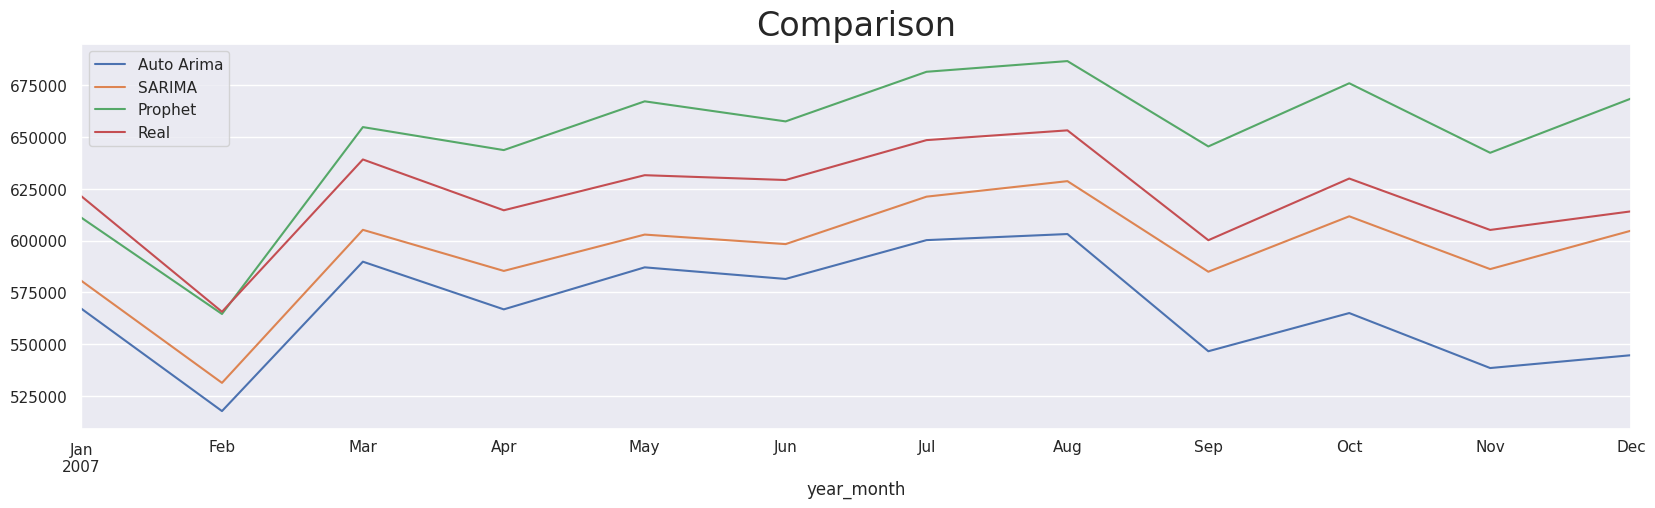

In [60]:
predictions.plot(figsize = (20,5))
plt.title("Comparison", size = 24)
plt.legend(['Auto Arima','SARIMA','Prophet','Real'])
plt.show()

### Comparación numérica

In [61]:
from sklearn.metrics import mean_squared_error 
rmse_autoarima = np.sqrt(mean_squared_error(predictions.test, predictions['autoarima']))
rmse_sarima = np.sqrt(mean_squared_error(predictions.test, predictions['sarima']))
rmse_prophet = np.sqrt(mean_squared_error(predictions.test, predictions['prophet']))
print('RMSE Autoarima:',rmse_autoarima)
print('RMSE SARIMA:',rmse_sarima)
print('RMSE Prophet:',rmse_prophet)

RMSE Autoarima: 54395.87746264432
RMSE SARIMA: 27404.65623912165
RMSE Prophet: 34188.88277997483
